## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [99]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [100]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [101]:
df.head(n=5)

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,164


In [102]:
df.tail(n=5)

,DATE,TAG,POSTS
2281,2022-04-01 00:00:00,php,3918
2282,2022-04-01 00:00:00,python,23968
2283,2022-04-01 00:00:00,r,4814
2284,2022-04-01 00:00:00,ruby,496
2285,2022-04-01 00:00:00,swift,1830


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [103]:
print("(rows, columns) =", df.shape)
print("rows =", df.shape[0])
print("columns =", df.shape[1])
print(df.count())

(rows, columns) = (2286, 3)
rows = 2286
columns = 3
DATE     2286
TAG      2286
POSTS    2286
dtype: int64


**Challenge**: Count the number of entries in each column of the dataframe

In [104]:
df.count()

DATE     2286
TAG      2286
POSTS    2286
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [105]:
print(df.groupby('TAG').sum())
print("Programming language with max total tags:\n", df.groupby('TAG').sum().idxmax())

              POSTS
TAG                
assembly      40115
c            378039
c#          1533052
c++          761504
delphi        49481
go            60942
java        1838572
javascript  2362112
perl          66632
php         1432151
python      1931570
r            445440
ruby         223745
swift        311517
Programming language with max total tags:
 POSTS    javascript
dtype: object


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [106]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,165,165
c,165,165
c#,166,166
c++,165,165
delphi,165,165
go,150,150
java,165,165
javascript,165,165
perl,165,165


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01".

Let's take a closer look at the 'DATE' column in our DataFrame. We can use the double square bracket notation to look at the second entry in the column.

#### Selecting an Individual Cell

In [107]:
print(df['DATE'][1])
print(df.DATE[1])

2008-08-01 00:00:00
2008-08-01 00:00:00


#### Inspecting the Data Type

In [108]:
type(df['DATE'][1])

str

In [109]:
print(pd.to_datetime(df['DATE'][1]))

2008-08-01 00:00:00


In [110]:
# Convert Entire Column
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,164


## Data Manipulation

Sometimes you want to convert your DataFrame so that each category has its own column. For example, suppose you needed to take the table below and create a separate column for each actor, where each row is the Age of the actor.



In [111]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


#### The .pivot() method

In [112]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [113]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
print('Num of rows:', reshaped_df.shape[0])
print('Num of columns:', reshaped_df.shape[1])
reshaped_df.head(n=10)

Num of rows: 166
Num of columns: 14


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,164.0,14.0,NaN,222.0,164.0,28.0,160.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1648.0,754.0,105.0,NaN,1135.0,638.0,130.0,480.0,537.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1152.0,725.0,127.0,614.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,580.0,97.0,502.0,452.0,1.0,159.0,NaN
2008-12-01,17.0,189.0,1597.0,631.0,134.0,NaN,829.0,626.0,133.0,479.0,439.0,1.0,161.0,NaN
2009-01-01,22.0,321.0,2377.0,851.0,164.0,NaN,1148.0,792.0,148.0,634.0,631.0,8.0,207.0,1.0
2009-02-01,37.0,332.0,2599.0,843.0,167.0,NaN,1207.0,948.0,164.0,764.0,629.0,9.0,287.0,1.0
2009-03-01,24.0,430.0,3163.0,1052.0,161.0,NaN,1436.0,1007.0,138.0,901.0,764.0,4.0,330.0,1.0


In [114]:
reshaped_df.tail(n=10)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2021-07-01,187.0,1703.0,5921.0,3767.0,146.0,642.0,8278.0,17253.0,140.0,4577.0,23989.0,4672.0,500.0,2252.0
2021-08-01,166.0,1614.0,5733.0,3462.0,141.0,779.0,7910.0,16952.0,118.0,4552.0,23005.0,4565.0,506.0,2180.0
2021-09-01,198.0,1792.0,5736.0,3901.0,145.0,658.0,7757.0,16589.0,113.0,4287.0,21843.0,4324.0,507.0,1920.0
2021-10-01,214.0,2193.0,5985.0,4052.0,150.0,757.0,7720.0,16039.0,131.0,4212.0,22757.0,4721.0,475.0,1830.0
2021-11-01,309.0,2337.0,6366.0,4154.0,151.0,701.0,8258.0,15796.0,80.0,4110.0,23323.0,4608.0,448.0,1753.0
2021-12-01,284.0,2260.0,5709.0,3862.0,159.0,771.0,7523.0,15257.0,103.0,3721.0,22018.0,3916.0,433.0,1661.0
2022-01-01,240.0,2062.0,5913.0,3888.0,151.0,794.0,7702.0,16263.0,131.0,4007.0,22624.0,4250.0,477.0,1988.0
2022-02-01,226.0,1791.0,5843.0,3487.0,187.0,689.0,7291.0,15476.0,97.0,3729.0,22684.0,4345.0,457.0,1886.0
2022-03-01,257.0,2104.0,6506.0,3853.0,134.0,833.0,8155.0,16397.0,106.0,3783.0,24653.0,5097.0,529.0,2084.0


In [115]:
# Print out the column names
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [116]:
# Count the number of entries per column
reshaped_df.count()

TAG
assembly      165
c             165
c#            166
c++           165
delphi        165
go            150
java          165
javascript    165
perl          165
php           165
python        165
r             163
ruby          165
swift         157
dtype: int64

When we count the number of entries per column we see that not all languages are the same. The reason is that the .count() method excludes NaN values. When we pivoted the DataFrame the NaN values were inserted when there were no posts for a language in that month (e.g., Swift in July, 2008).

#### Dealing with NaN values

.fillna() method replaces NaN values with another value

In [117]:
# Using inplace
reshaped_df.fillna(value=0, inplace=True)
# Or without inplace
# reshaped_df = reshaped_df.fillna(0)

reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,164.0,14.0,0.0,222.0,164.0,28.0,160.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1648.0,754.0,105.0,0.0,1135.0,638.0,130.0,480.0,537.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1152.0,725.0,127.0,614.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,580.0,97.0,502.0,452.0,1.0,159.0,0.0


In [118]:
# Check if there are any NaN value left in the entire DataFrame
reshaped_df.isna().values.any()

False

Here we are using the .isna() method that we've used before, but we're chaining two more things: the values attribute and the any() method. This means we don't have to search through the entire DataFrame to spot if .isna() is True.

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [124]:
import matplotlib.pyplot as plt
import numpy as np

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

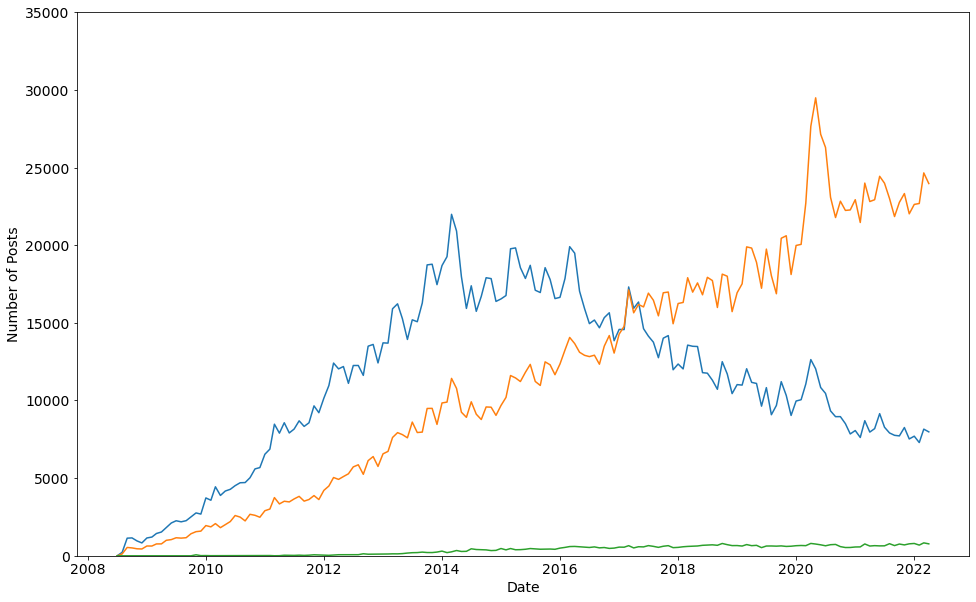

In [132]:
java = np.array(reshaped_df['java'])
python = reshaped_df['python']
go = reshaped_df['go']
date = np.array(reshaped_df.index)

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(date, java)
plt.plot(date, python)
plt.plot(date, go)

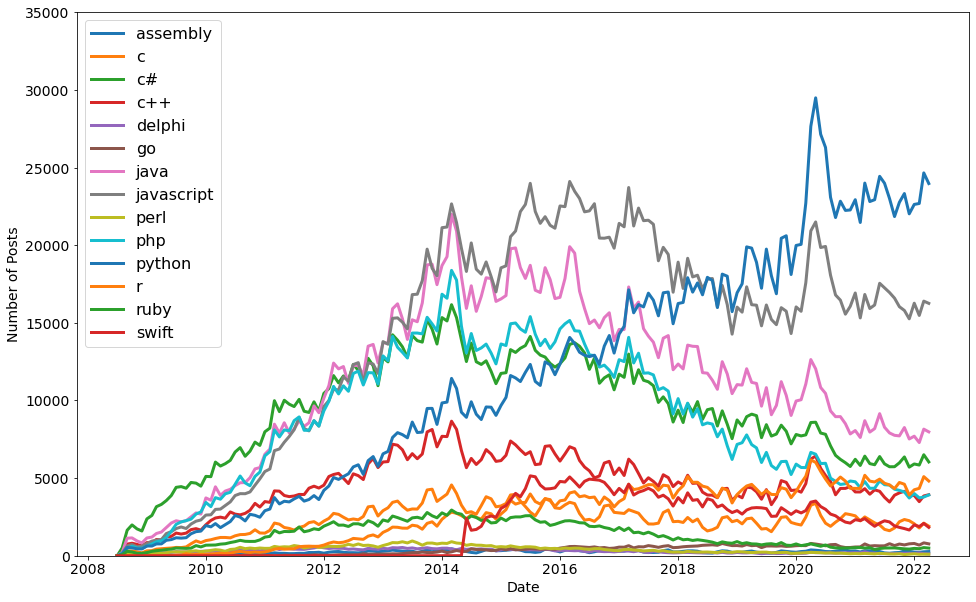

In [139]:
# Plot all columns
date = np.array(reshaped_df.index)

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(date, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

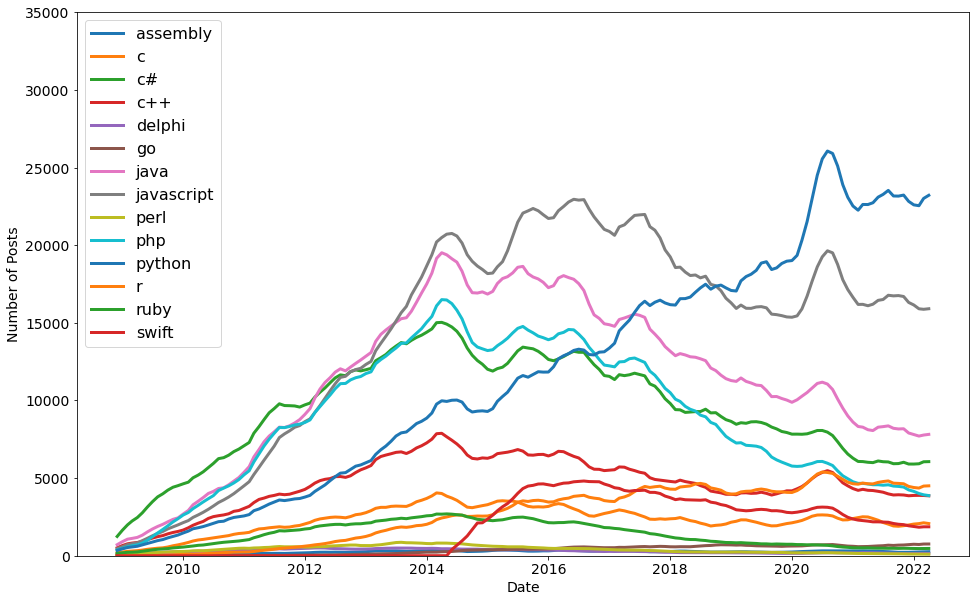

In [146]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

## Learning Points & Summary

#### Learning points
* Use .groupby() to explore the number of posts and entries per programming language.

* Convert strings to Datetime objects with to_datetime() for easier plotting.

* Reshape our DataFrame by converting categories to columns using .pivot().

* Use .count() and isna().values.any() to look for NaN values in our DataFrame, which then can be replaced using .fillna().

* Create (multiple) line charts using .plot() with a for-loop.

* Create (multiple) line charts using .plot() with a for-loop.

* Add a legend to tell apart which line is which by color.

* Smooth out our time-series observations with .rolling().mean() and plot them to better identify trends over time.